In [1]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
# https://www.udemy.com/data-science-supervised-machine-learning-in-python
# This is an example of a K-Nearest Neighbors classifier on MNIST data.
# We try k=1...5 to show how we might choose the best k.
# sudo pip install sortedcontainers (if you don't have it)
#from __future__ import print_function, division
#from future.utils import iteritems
#from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
# Note: You can't use SortedDict because the key is distance
# if 2 close points are the same distance away, one will be overwritten
from util import get_data
from datetime import datetime
%matplotlib inline

In [2]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i, x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j, xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add((d, self.y[j]))
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add((d, self.y[j]))
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v, count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

Reading in and transforming data...

k = 1
Training time: 0:00:00.000011
Train accuracy: 1.0
Time to compute train accuracy: 0:00:10.326354 Train size: 1000
Test accuracy: 0.901
Time to compute test accuracy: 0:00:14.614404 Test size: 1000

k = 2
Training time: 0:00:00.000005
Train accuracy: 1.0
Time to compute train accuracy: 0:00:10.269960 Train size: 1000
Test accuracy: 0.901
Time to compute test accuracy: 0:00:13.872582 Test size: 1000

k = 3
Training time: 0:00:00.000009
Train accuracy: 0.951
Time to compute train accuracy: 0:00:10.744749 Train size: 1000
Test accuracy: 0.887
Time to compute test accuracy: 0:00:15.097769 Test size: 1000

k = 4
Training time: 0:00:00.000003
Train accuracy: 0.953
Time to compute train accuracy: 0:00:11.036338 Train size: 1000
Test accuracy: 0.902
Time to compute test accuracy: 0:00:14.352556 Test size: 1000

k = 5
Training time: 0:00:00.000003
Train accuracy: 0.926
Time to compute train accuracy: 0:00:10.240321 Train size: 1000
Test accuracy: 0.888


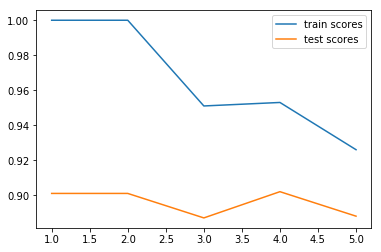

In [3]:
if __name__ == '__main__':
    X, Y = get_data(2000)
    Ntrain = 1000
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, label='train scores')
    plt.plot(ks, test_scores, label='test scores')
    plt.legend()
    plt.show()